# Academics

Exploring academic results from students:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 22 }
plt.rc('font', **font)

### Results

In [3]:
filenames = [
    '../../data/demographics/academics_I.csv',
    '../../data/demographics/academics_II.csv'
]

In [4]:
# li = []
# for filename in filenames:
#     _df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(_df)
# df = pd.concat(li, axis=0, ignore_index=True, sort=False)

In [5]:
df = pd.read_csv(filenames[0]) # first dataset

In [6]:
'{:,} rows'.format(len(df))

'40,102 rows'

In [7]:
# df.head()

In [8]:
df['Exam Result'].unique()

array(['P', 'RW', 'F', 'RE', 'FX', nan, 'FI', 'F0', 'PP', 'P4'], dtype=object)

In [9]:
subjects = list(df['Subject'].unique())

In [10]:
len(subjects)

136

In [11]:
subjects[:5]

['CA103', 'CA106', 'CA115', 'CA116', 'CA117']

In [12]:
years = sorted(df['Year'].unique())

In [13]:
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [14]:
def get_num_students(year, subject):
    return len(df[(df['Year'] == year) & 
                  (df['Subject'] == subject)]['Student Number'].unique())

In [15]:
get_num_students(2012, 'CA114')

67

In [16]:
exam_months = sorted(df['Exam Month'].unique())

In [17]:
exam_months

[1.0, 5.0, 8.0, nan]

In [18]:
def get_num_students_exam_month(year, subject, exam_month):
    return len(df[(df['Year'] == year) & 
                  (df['Subject'] == subject) & 
                  (df['Exam Month'] == float(exam_month))]['Student Number'].unique())

In [19]:
# course is given on the second semester
get_num_students_exam_month(2012, 'CA114', 1), \
get_num_students_exam_month(2012, 'CA114', 5), \
get_num_students_exam_month(2012, 'CA114', 8)

(0, 67, 19)

In [20]:
def plot_students(course):
    
    keys = []
    values = []
    for year in years:
        keys.append(year)
        val = get_num_students(year, course)
        values.append(val)

    fig, ax = plt.subplots(figsize=(18, 10))
    bars = ax.bar(range(len(keys)), values, align='center')
    plt.xticks(range(len(keys)), [ str(year - 1) + ' - ' + str(year) for year in keys ], fontsize=18)
    for bar in bars:
        height = bar.get_height()
        if height == 0:
            continue
        width = bar.get_width()
        x_value = bar.get_x()
        ax.text(x_value + width / 2.5, height + 1, int(height),
                color='black', fontweight='bold')
    ymin, ymax = plt.ylim()   # return the current ylim
    newymax = int(ymax + ymax * 0.1) # 10% more so labels fit
    plt.ylim(top=newymax)
    plt.xlabel('Academic Year')
    plt.ylabel('Number of Students')
    
    plt.savefig('../../figures/exploring_{}_Students.png'.format(course), bbox_inches="tight")


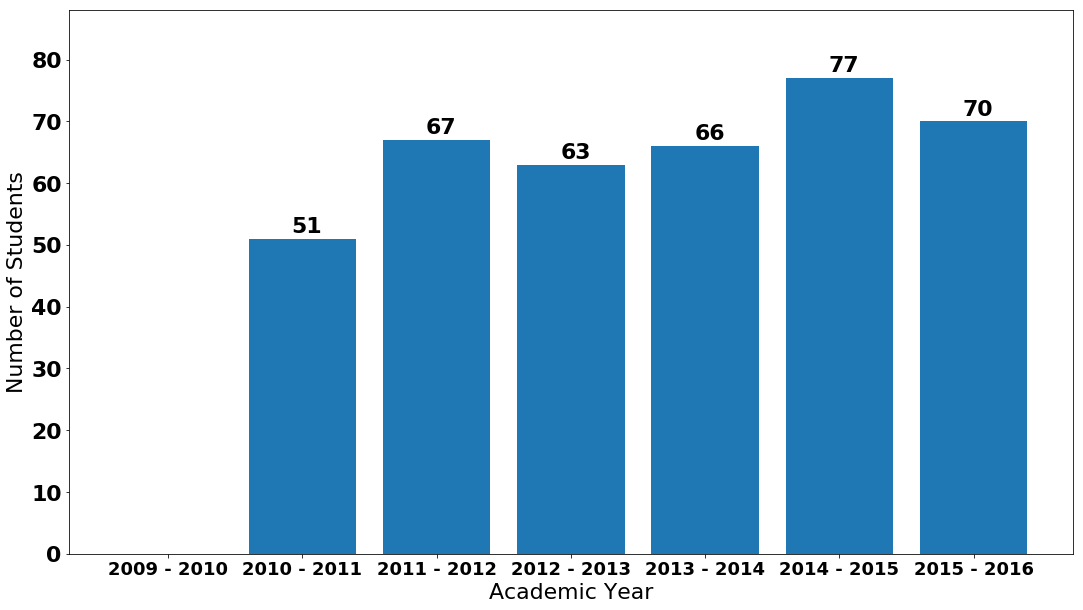

In [21]:
plot_students('CA114') # add academic years properly?

In [22]:
import calendar

colors = ["b", "c", "m", "g", "r", "y", "k", "w", "pink", "salmon", "indigo", "lime"]

def plot_examinations(course):

    keys = []
    values = {}
    for year in sorted(years):
        keys.append(year)
        for exam_month in [1, 5, 8]:
            values.setdefault(exam_month, [])
            val = get_num_students_exam_month(year, course, exam_month)
            values[exam_month].append(val)
    
    fig, ax = plt.subplots(figsize=(18, 10))
    bars = {}
    rects = []
    rects_text = []
    width_len = 1. / len(values)
    color_i = 0
    width = 0
    for month in sorted(values):
        if all(v == 0 for v in values[month]): # Same as: list(l) == [0] * len(l)
            continue
        x_bar = [x + width for x in range(len(keys))]
        bars[month] = ax.bar(x_bar, values[month], align='center', width=width_len, color=colors[color_i])
        rects.append(bars[month][0])
        rects_text.append(calendar.month_name[month]) # Month number to name
        # labels
        for bar in bars[month]:
            bar_height = bar.get_height()
            if bar_height == 0:
                continue
            bar_width = bar.get_width()
            x_value = bar.get_x()
            ax.text(x_value + bar_width / 4.5, bar_height + 1, int(bar_height),
                    color='black', fontweight='bold')
        color_i += 1
        width += width_len
    plt.xticks(range(len(keys)), [ str(year - 1) + ' - ' + str(year) for year in keys ], fontsize=18)
    ymin, ymax = plt.ylim()   # return the current ylim
    newymax = int(ymax + ymax * 0.1) # 10% more so labels fit
    plt.ylim(top=newymax)
    ax.legend(rects, rects_text, loc="best")
    plt.xlabel('Academic Year')
    plt.ylabel('Number of Students')

    plt.savefig('../../figures/exploring_{}_Resits.png'.format(course), bbox_inches="tight")
    

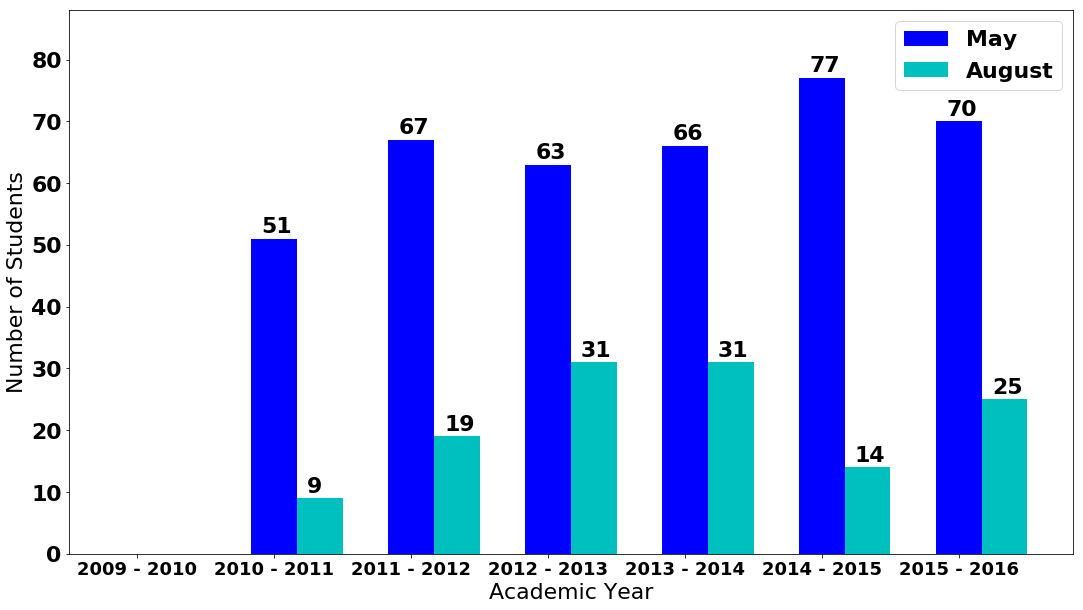

In [23]:
plot_examinations('CA114')

In [24]:
def get_students(year, subject):
    return df[(df['Year'] == year) & 
              (df['Subject'] == subject)]['Student Number'].unique()

In [25]:
# get_students(2012, 'CA114')

In [26]:
def get_student_mark(year, subject, exam_month, student_id):
    indexes = df[(df['Year'] == year) & 
              (df['Subject'] == subject) & 
              (df['Exam Month'] == float(exam_month)) & 
              (df['Student Number'] == student_id)].index
    grade = None
    if len(indexes) > 0:
        grade = df.iloc[indexes[0], :]['Exam Result']
    return grade

In [27]:
get_student_mark(2012, 'CA114', 5, 11480232)

'FX'

In [28]:
def plot_examinations_pass_fail(course):
                
    keys = []
    pass_values = {}
    fail_values = {}
    for year in sorted(years):
        keys.append(year)
        for exam_month in [1, 5, 8]:
            pass_values.setdefault(exam_month, [])
            fail_values.setdefault(exam_month, [])
            pass_count = 0
            fail_count = 0
            for student_id in get_students(year, course):
                mark = get_student_mark(year, course, exam_month, student_id)
                if mark and (type(mark) is not float or not np.isnan(mark)):
                    if mark.startswith('P'):
                        pass_count += 1
                    else:
                        fail_count += 1
            pass_values[exam_month].append(pass_count)
            fail_values[exam_month].append(fail_count)

    fig, ax = plt.subplots(figsize=(18, 10))
    pass_bars = {}
    fail_bars = {}
    width_len = 1. / len(pass_values)
    width = 0
    for month in sorted(pass_values):
        if all(v == 0 for v in pass_values[month]) and all(v == 0 for v in fail_values[month]):
            continue
        x_bar = [x + width for x in range(len(keys))]
        # label="Pass"
        pass_bars[month] = ax.bar(x_bar, pass_values[month], align='center', width=width_len, color='g', label='Pass')
        # label="Fail"
        fail_bars[month] = ax.bar(x_bar, fail_values[month], align='center', width=width_len, color='r', label='Fail',
                                  bottom=pass_values[month])
        # labels
        bar_i = 0
        while bar_i < len(pass_bars[month]):
            pass_bar = pass_bars[month][bar_i]
            fail_bar = fail_bars[month][bar_i]
            bar_i += 1
            bar_height = pass_bar.get_height() + fail_bar.get_height()
            if bar_height == 0:
                continue
            bar_width = pass_bar.get_width() # width is the same for both bars
            fail_percentage = 0
            if pass_bar.get_height() + fail_bar.get_height() > 0:
                fail_percentage = fail_bar.get_height() * 1. / (pass_bar.get_height() + fail_bar.get_height())
            ax.text(pass_bar.get_x() + bar_width / 5, bar_height + 1, "{:.0%}".format(fail_percentage),
                    color='black', fontweight='bold')
        width += width_len
    plt.xticks(range(len(keys)), [ str(year - 1) + ' - ' + str(year) for year in keys ], fontsize=18)
    ymin, ymax = plt.ylim()   # return the current ylim
    newymax = int(ymax + ymax * 0.1) # 10% more so labels fit
    plt.ylim(top=newymax)
    plt.xlabel('Academic Year')
    plt.ylabel('Number of Students')
    
    plt.savefig('../../figures/exploring_{}_Pass_Fail_Rates.png'.format(course), bbox_inches="tight")
    

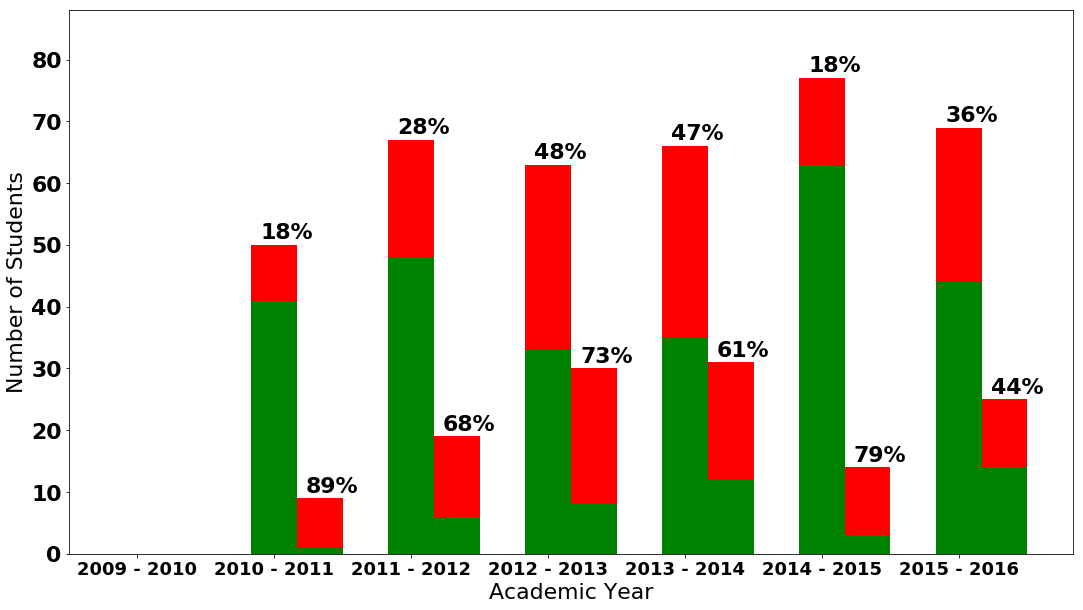

In [29]:
plot_examinations_pass_fail('CA114')